# Additional Time Domain Measures

These measures are not included in the main analyses, but briefly explored here.

Included measures:
- Sevcik Fractal Dimension (['sevcik fractal dimension', 'sevcik dimension'])

In [1]:
# Setup notebook state
from nbutils import setup_notebook; setup_notebook()

In [2]:
from neurodsp.sim import sim_powerlaw, sim_synaptic_current, sim_combined
from neurodsp.utils import set_random_seed

In [3]:
# Import custom project code
from apm.io import APMDB
from apm.run import run_sims, run_sims_load
from apm.methods import sevcik_fd
from apm.methods.settings import SFD_PARAMS
from apm.plts.sims import plot_ap_sims, plot_pe_sims, plot_sims_two
from apm.plts.settings import COLORS
from apm.plts.utils import figsaver
from apm.sim.examples import get_examples, check_examples
from apm.sim.settings import N_SIMS
from apm.sim.defs import SIM_ITERS

## Settings

In [4]:
# Get current sampling rate
fs = SIM_ITERS.fs

In [5]:
# Settings for saving figures
SAVE_FIG = False
FIGPATH = APMDB().figs_path / 'XX'

# Create helper function to manage figsaver settings
fsaver = figsaver(SAVE_FIG, FIGPATH)

In [6]:
# Set the random seed
set_random_seed(111)

In [7]:
# Define collection of example signals
examples = get_examples()

## Sevcik Fractal Dimension

In [8]:
# Check Sevcik fractal dimension measure parameters
print(SFD_PARAMS)

{}


#### Calculate Fractal Dimension on Example Signals

In [9]:
# Check Sevcik fractal dimension measures on example signals
check_examples(examples, sevcik_fd, SFD_PARAMS, 'SEVCIK fractal dimension')

Computed SEVCIK fractal dimension:
  powerlaw       : 	 1.6716
  synaptic       : 	 1.6708
  knee           : 	 1.6480
  oscillation    : 	 1.6652
  burst          : 	 1.5920
  combined       : 	 1.6554
  comb_burst     : 	 1.6679
  comb_peak      : 	 1.6498


### Aperiodic Variations

In [10]:
# Run simulations calculating fractal dimension across exponents
sfd_sims_exp = run_sims(sim_powerlaw, SIM_ITERS['ap_exp'], sevcik_fd, SFD_PARAMS, N_SIMS)

In [11]:
# Run simulations calculating fractal dimension across exponents with an oscillation
sfd_sims_comb = run_sims(sim_combined, SIM_ITERS['comb_exp'], sevcik_fd, SFD_PARAMS, N_SIMS)

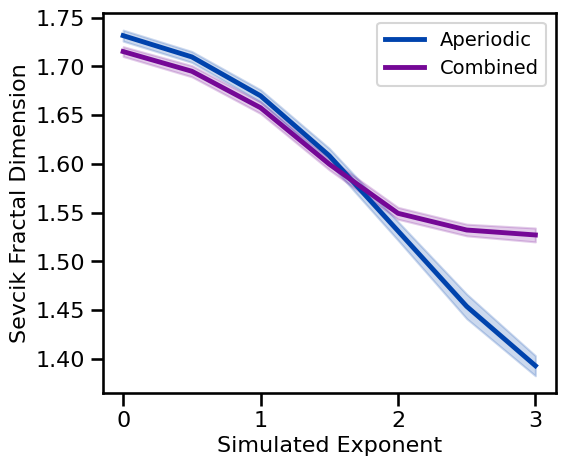

In [12]:
# Plot fractal dimension estimates across aperiodic variations
plot_ap_sims(sfd_sims_exp, sfd_sims_comb, 'Sevcik Fractal Dimension', **fsaver('sfd_ap'))

### Periodic Variations

In [13]:
# Run simulations calculating fractal dimension across oscillation frequency
sfd_sims_freq = run_sims(sim_combined, SIM_ITERS['osc_freq'], sevcik_fd, SFD_PARAMS, N_SIMS)

In [14]:
# Run simulations calculating fractal dimension across oscillation power
sfd_sims_pow = run_sims(sim_combined, SIM_ITERS['osc_pow'], sevcik_fd, SFD_PARAMS, N_SIMS)

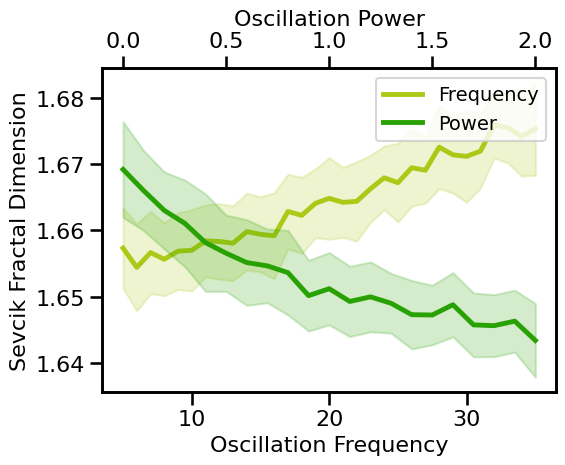

In [15]:
# Plot fractal dimension estimates across periodic variations
plot_pe_sims(sfd_sims_freq, sfd_sims_pow, 'Sevcik Fractal Dimension', **fsaver('sfd_pe'))

### Knee Variations

In [16]:
# Run simulations calculating fractal dimension across timescales
sfd_sims_tscales = run_sims(sim_synaptic_current, SIM_ITERS['syn_tscales'],
                            sevcik_fd, SFD_PARAMS, N_SIMS)

In [17]:
# Run simulations calculating fractal dimension across knee values (sims from file)
sfd_sims_knee = run_sims_load('ap-knee-' + str(fs), sevcik_fd, SFD_PARAMS)

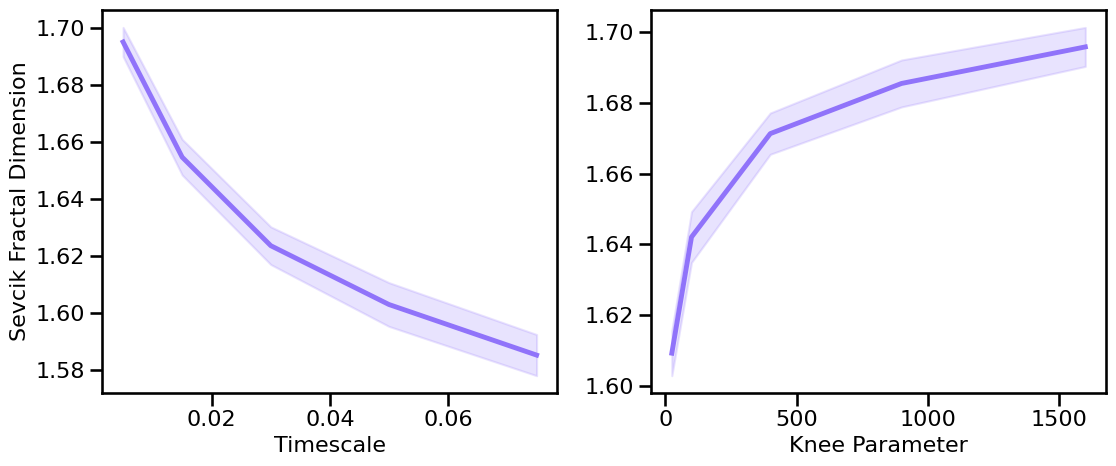

In [18]:
# Plot the estimated fractal dimension across different timescales & knees
plot_sims_two(SIM_ITERS['syn_tscales'].values, sfd_sims_tscales, 'Timescale',
              SIM_ITERS['kn_knee'].values, sfd_sims_knee, 'Knee Parameter',
              ylabel='Sevcik Fractal Dimension', color=COLORS['KN'], **fsaver('sfd_kn_vars'))

### Periodic Variations

In [19]:
# Run simulations calculating fractal dimension across peak bandwidths (sims from file)
sfd_sims_bw = run_sims_load('comb-bw-' + str(fs), sevcik_fd, SFD_PARAMS)

In [20]:
# Run simulations calculating fractal dimension across burst probabilities
sfd_sims_burst = run_sims(sim_combined, SIM_ITERS['comb_burst'], sevcik_fd, SFD_PARAMS, N_SIMS)

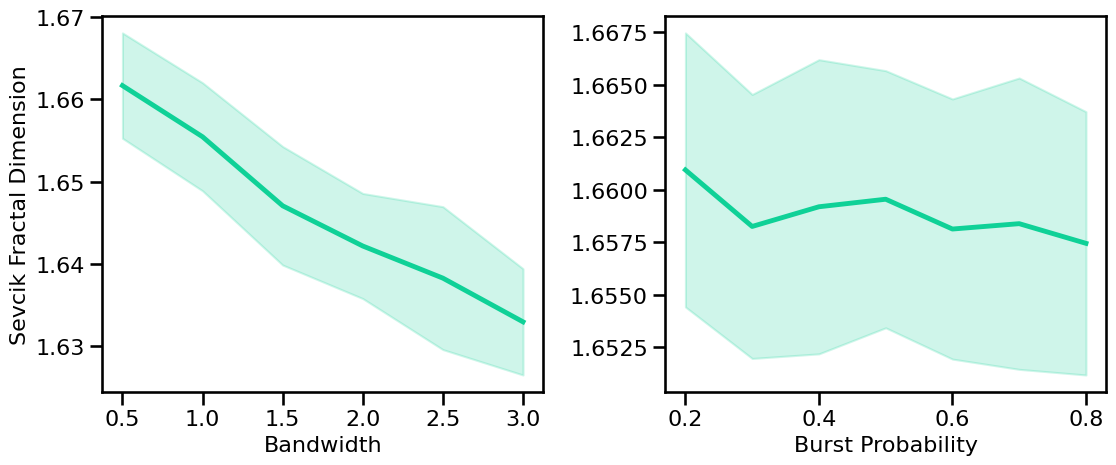

In [21]:
# Plot the estimated fractal dimension across periodic variations
plot_sims_two(SIM_ITERS['peak_bw'].values, sfd_sims_bw, 'Bandwidth',
              SIM_ITERS['comb_burst'].values, sfd_sims_burst, 'Burst Probability',
              ylabel='Sevcik Fractal Dimension', color=COLORS['BW'], **fsaver('sfd_pe_vars'))